## Diabetes Prediction

Given *medical data about patients*, let's try to predict whether a given patient will have **diabetes** or not.

We will use logistic regression, support vector machine, and neural network models to make our predictions.

Data source: https://www.kaggle.com/datasets/uciml/pima-indians-diabetes-database

### Importing Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier

In [2]:
data = pd.read_csv('archive/diabetes.csv')
data

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


### EDA / Data Visualization

In [4]:
correlation_matrix = data.corr()

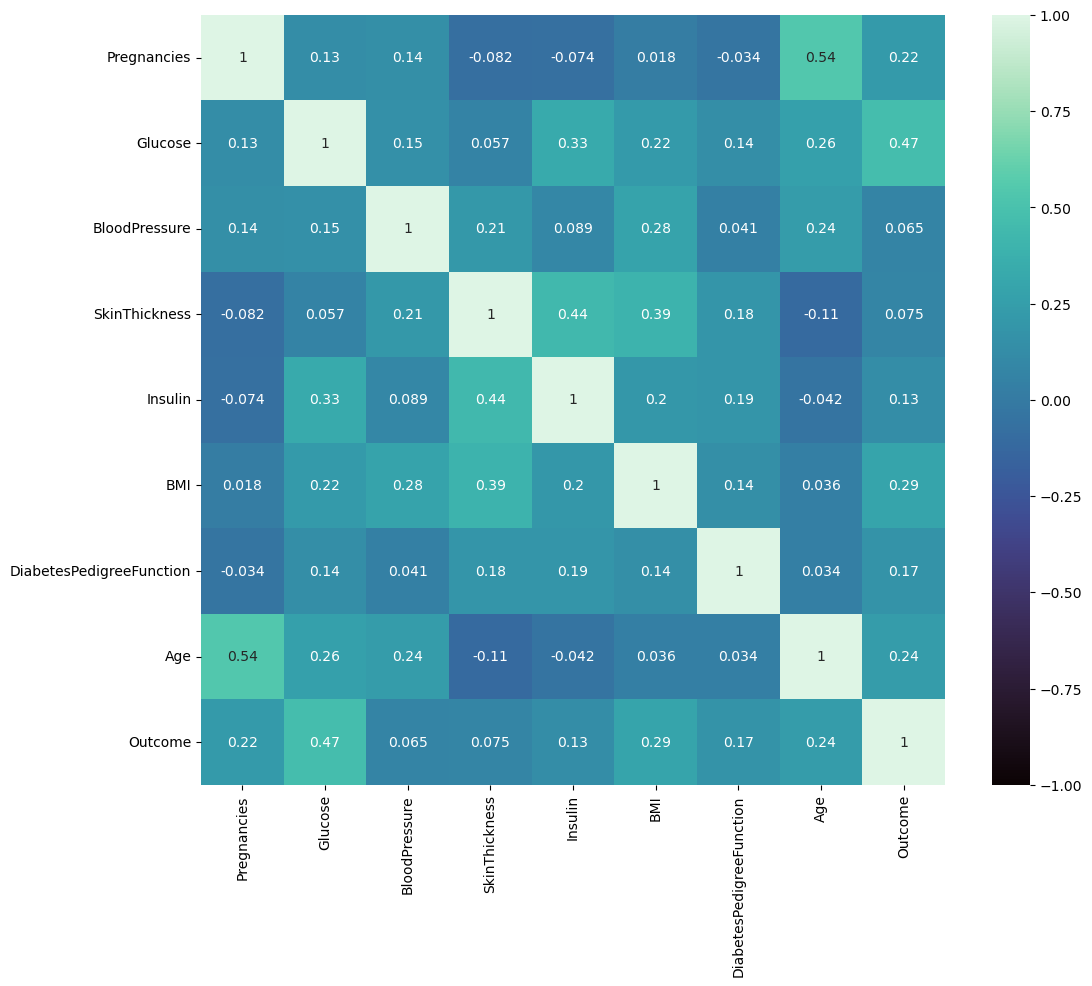

In [5]:
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, vmin=-1.0, vmax=1.0, cmap='mako')
plt.show()

In [11]:
age_ct = pd.crosstab(pd.qcut(data['Age'], q=4, labels=['Youngest', 'Younger', 'Older', 'Oldest']), data['Outcome'])
age_ct

Outcome,0,1
Age,,
Youngest,188,31
Younger,124,53
Older,105,95
Oldest,83,89


In [12]:
age_ct_avgs = age_ct[1] / (age_ct[0] + age_ct[1])

age_ct = pd.concat([age_ct, age_ct_avgs], axis=1)
age_ct.columns = ['Negative', 'Positive', '% Positive']

age_ct

,Negative,Positive,% Positive
Age,,,
Youngest,188,31,0.141553
Younger,124,53,0.299435
Older,105,95,0.475000
Oldest,83,89,0.517442


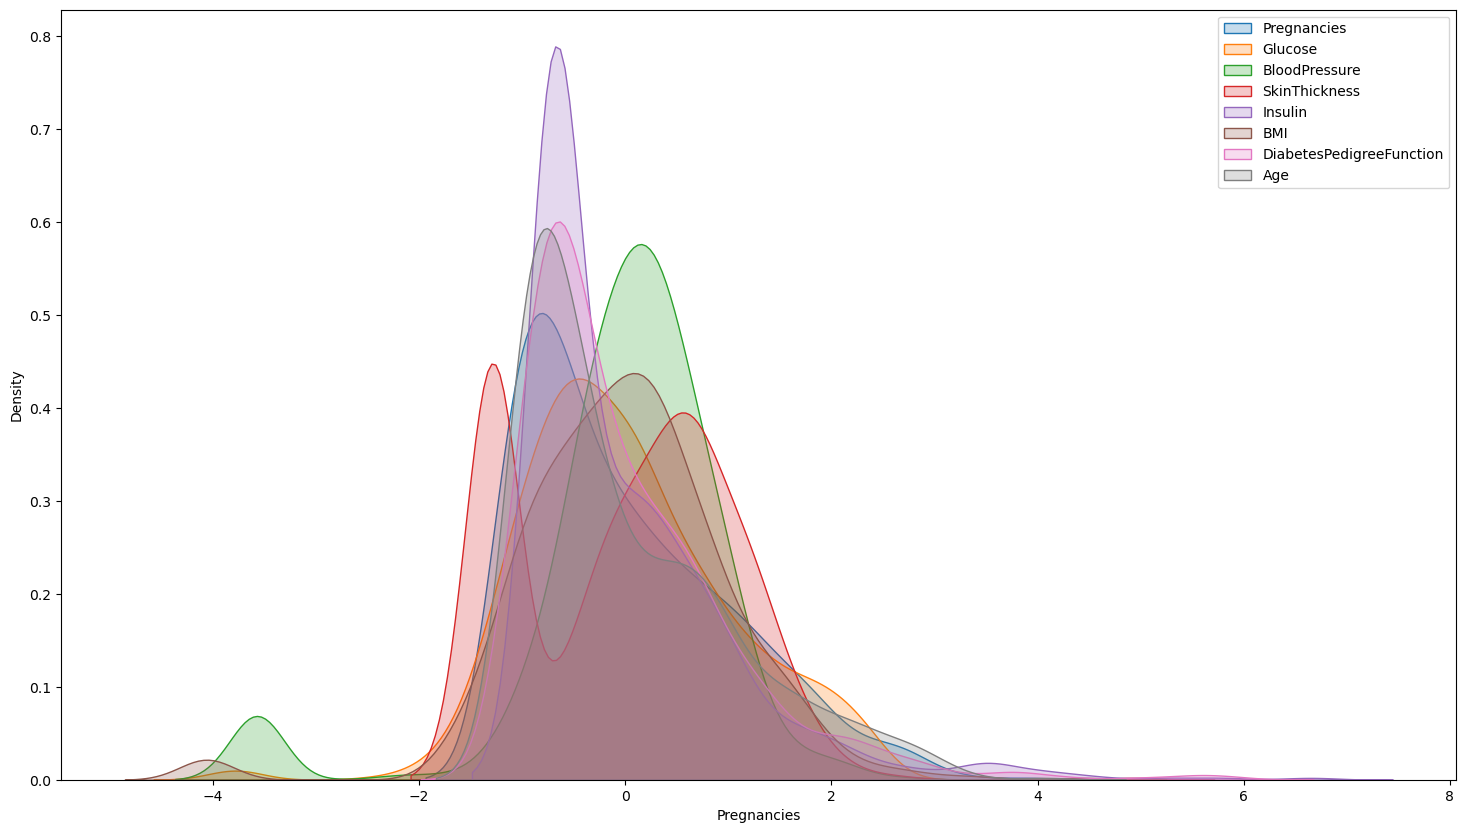

In [16]:
scaler = StandardScaler()
scaled_columns = data.iloc[:, :-1]
scaled_columns = pd.DataFrame(scaler.fit_transform(scaled_columns), columns=scaled_columns.columns)

plt.figure(figsize=(18, 10))
for column in scaled_columns.columns:
    sns.kdeplot(scaled_columns[column], fill=True, label=column)
plt.legend()
plt.show()

### Splitting and Scaling

In [17]:
y = data.loc[:, 'Outcome']
X = data.drop('Outcome', axis=1)

In [18]:
X = scaler.fit_transform(X)

In [19]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, random_state=24)

### Training and Results

In [35]:
log_model = LogisticRegression()
svm_model = SVC(C = 1.0)
ann_model = MLPClassifier(hidden_layer_sizes=(16, 16))

In [36]:
log_model.fit(X_train, y_train)
svm_model.fit(X_train, y_train)
ann_model.fit(X_train, y_train)

/home/aditya/miniconda3/envs/tfenv/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:781: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.



,hidden_layer_sizes,"(16, ...)"
,activation,'relu'
,solver,'adam'
,alpha,0.0001
,batch_size,'auto'
,learning_rate,'constant'
,learning_rate_init,0.001
,power_t,0.5
,max_iter,200
,shuffle,True
,random_state,None


In [37]:
log_acc = log_model.score(X_test, y_test)
svm_acc = svm_model.score(X_test, y_test)
ann_acc = ann_model.score(X_test, y_test)

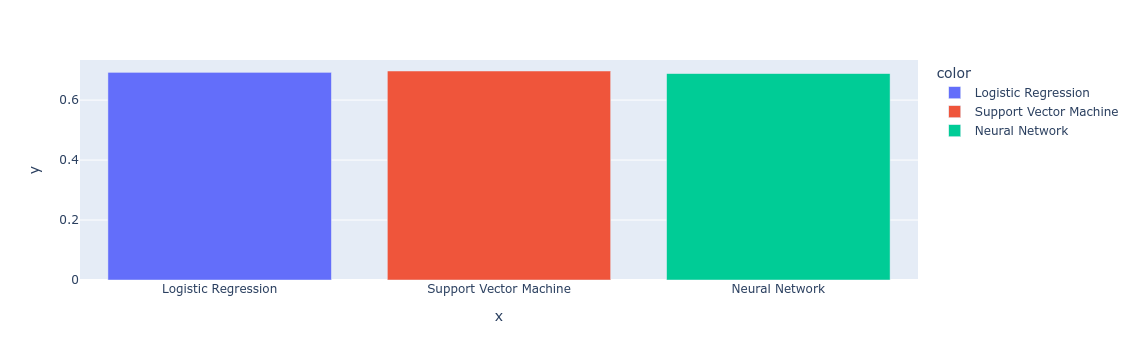

In [38]:
fig = px.bar(
    x = ['Logistic Regression', 'Support Vector Machine', 'Neural Network'],
    y = [log_acc, svm_acc, ann_acc],
    color= ['Logistic Regression', 'Support Vector Machine', 'Neural Network']
)
fig.show()

In [39]:
print("    Logistic Regression:", log_acc)
print("Support Vector Machine :", svm_acc)
print("          MLPClassifier:", ann_acc)

    Logistic Regression: 0.6926406926406926
Support Vector Machine : 0.696969696969697
          MLPClassifier: 0.6883116883116883
